# Prioritized Planning Max Flow

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## PP max flow solver

In [2]:
import pickle
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from swarm_prm.solvers.macro.swarm_prm.gaussian_prm import GaussianPRM
from swarm_prm.solvers.macro.swarm_prm.prioritized_planning_max_flow import AbstractGraph, STAStar, PrioritizedPlanningMaxFlow

with open("gaussian_prm.pkl", "rb") as f:
    gaussian_prm = pickle.load(f)

agent_radius = 0.5
agent_count = 1000

graph = AbstractGraph(gaussian_prm, agent_radius, agent_count)


# Visualize Heuristic
def visualize_heuristic(gaussian_prm, heuristic):
    """
        Visualize Gaussian Nodes on the map
    """
    fig, ax = plt.subplots(figsize=(10, 10))

    # Visualize G nodes
    cmap = plt.get_cmap('coolwarm')
    for i, gaussian_node in enumerate(gaussian_prm.gaussian_nodes):
        gaussian_node.visualize(ax, edgecolor=cmap(heuristic[i]/20))

    for obs in gaussian_prm.map.obstacles:
        if obs.obs_type == "CIRCLE": 
            x, y = obs.get_pos()
            # ax.plot(x, y, 'ro', markersize=3)
            ax.add_patch(Circle((x, y), radius=obs.radius, color="black"))
        elif obs.obs_type == "POLYGON":
            x, y = obs.geom.exterior.xy
            ax.fill(x, y, fc="black")

    ax.set_aspect('equal')
    ax.set_xlim(left=0, right=gaussian_prm.map.width)
    ax.set_ylim(bottom=0, top=gaussian_prm.map.height)
    plt.show()


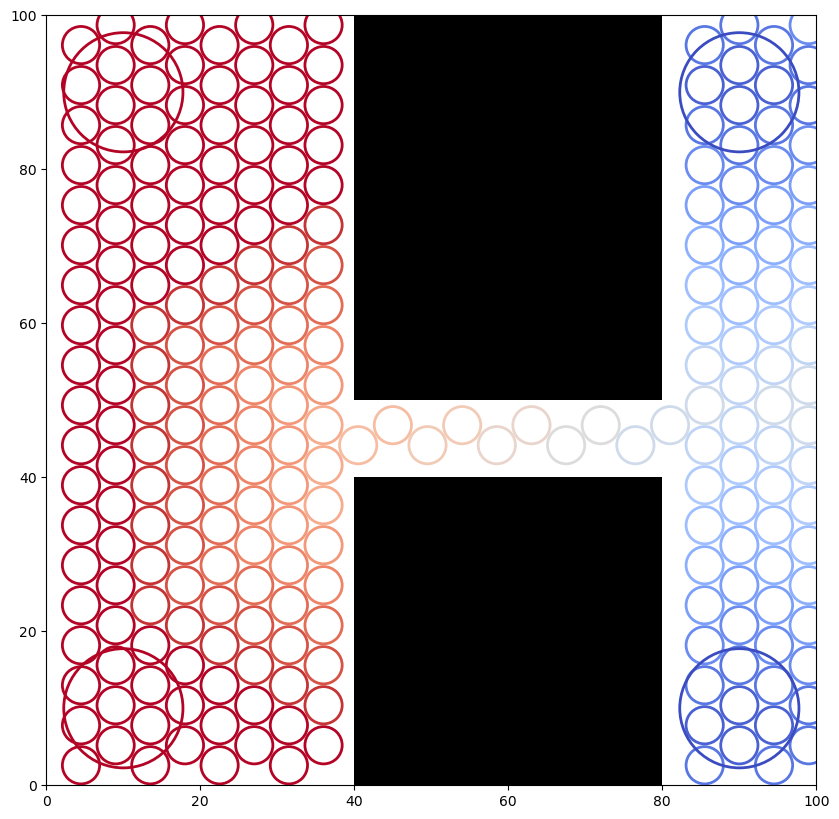

In [3]:
visualize_heuristic(gaussian_prm, graph.heuristic)

In [4]:
pp_maxflow = PrioritizedPlanningMaxFlow(gaussian_prm, agent_radius, agent_count)
print(pp_maxflow.graph.starts_idx)
print(pp_maxflow.graph.goals_idx)
pp_maxflow.solve()
# import cProfile
# cProfile.run("pp_maxflow.solve()")

# macro_sol = gaussian_prm.get_macro_solution(flow_dict)
# print(macro_sol)
# simple_paths, gaussian_paths = gaussian_prm.get_solution(flow_dict, timestep, num_agent)
# with open("simple_paths.pkl", "wb") as f:
    # pickle.dump(simple_paths, f)

[238 239]
[240 241]
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints
Edge Constraints
Capacity Constraints


KeyboardInterrupt: 

In [ ]:
# gaussian_prm.visualize_g_nodes()
# gaussian_prm.visualize_roadmap()
# fig, ax = instance.visualize()

# # apf_solver.animate_solution(fig, ax)
# for path in simple_paths:
#     x_coords = [loc[0] for loc in path]
#     y_coords = [loc[1] for loc in path]
#     ax.plot(x_coords, y_coords, '-*', label='Path', color='blue')
# # 